## Importing the Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the DataFrame

* Import the DataFrame into the jupyter notebook
* Read the 5 columns of the dataframe

In [2]:
train_data = pd.read_csv('train.csv')

train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Analysis

Let's analysis the data with the correlation of the dataset.
* The relation between the Survived and Age.
* The relation between the Survived and Sex.
* The relation between the Survived and Embarked.

E:\PROGRAM\AnaC\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


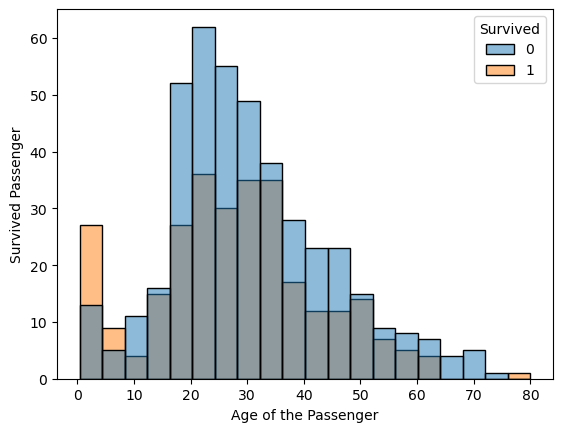

In [4]:
# Survived and Age

sns.histplot(data=train_data, x='Age', hue='Survived')
plt.ylabel('Survived Passenger')
plt.xlabel('Age of the Passenger')
plt.show()

E:\PROGRAM\AnaC\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


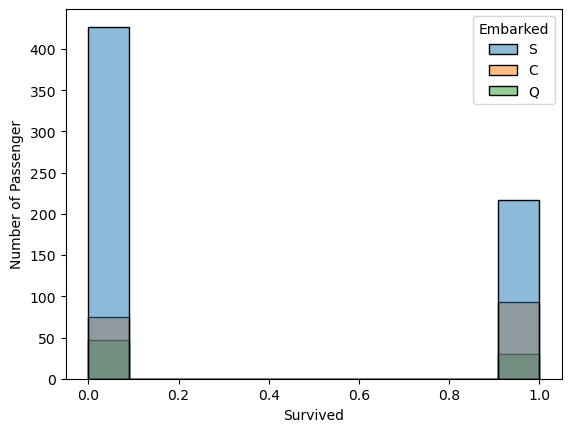

In [5]:
# Survived and Embarked
sns.histplot(data=train_data, x='Survived', hue='Embarked')
plt.ylabel('Number of Passenger')
plt.show()

E:\PROGRAM\AnaC\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


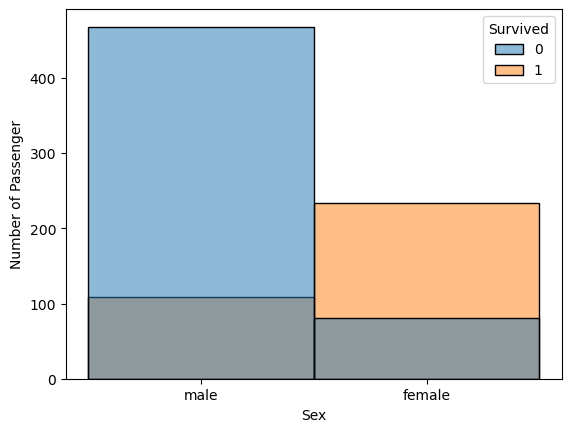

In [6]:
# Survived and Sex

sns.histplot(data=train_data, x='Sex', hue='Survived')
plt.ylabel('Number of Passenger')
plt.xlabel('Sex')
plt.show()

E:\PROGRAM\AnaC\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


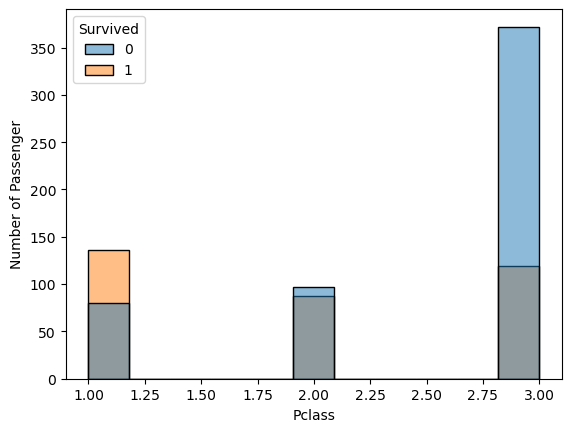

In [7]:
# Survived and Pclass

sns.histplot(data=train_data, x='Pclass', hue='Survived')
plt.ylabel('Number of Passenger')
plt.show()

Let's check if their is any null value of not.

In [8]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Feature Engineering

* Convert the Categorical Data into numberical Data.
* Fill the garbage value in the place of Null Value.

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X['Age'] = X['Age'].bfill()

        X['Embarked'] = X['Embarked'].bfill()
        
        return X

In [10]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        encoder = OneHotEncoder()

        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        column_name = ['C', 'S', 'Q', 'N']

        for i in range(len(matrix.T)):
            X[column_name[i]] = matrix.T[i]

        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        column_name = ['Female', 'Male']

        for i in range(len(matrix.T)):
            X[column_name[i]] = matrix.T[i]
        return X

In [22]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(['PassengerId', 'Embarked', 'Sex', 'Name', 'N', 'Cabin', 'Ticket'], axis=1, errors='ignore')

In [23]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('age_imputer', AgeImputer()),
                    ('feature_encoder', FeatureEncoder()),
                    ('feature_dropper', FeatureDropper())])

train_dataset = pipeline.fit_transform(train_data)

<Axes: >

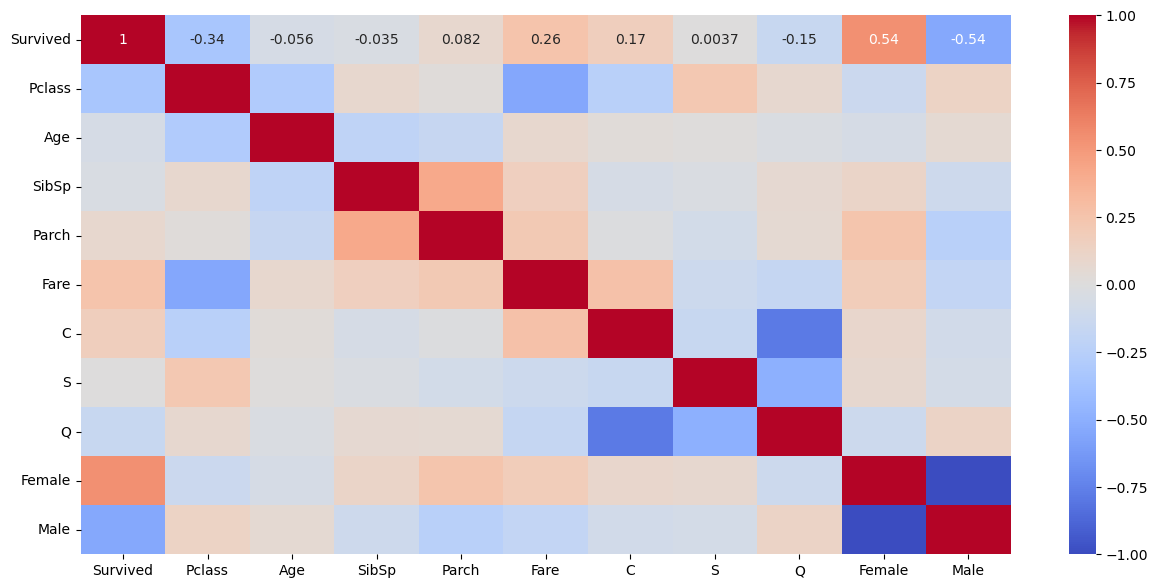

In [24]:
plt.figure(figsize=(15, 7))
sns.heatmap(data=train_dataset.corr(), annot=True, cmap='coolwarm')


In [25]:
# checking the data after applying feature engineering
train_dataset

Survived  Pclass   Age  SibSp  Parch     Fare    C    S    Q  Female  \
0           0       3  22.0      1      0   7.2500  0.0  0.0  1.0     0.0   
1           1       1  38.0      1      0  71.2833  1.0  0.0  0.0     1.0   
2           1       3  26.0      0      0   7.9250  0.0  0.0  1.0     1.0   
3           1       1  35.0      1      0  53.1000  0.0  0.0  1.0     1.0   
4           0       3  35.0      0      0   8.0500  0.0  0.0  1.0     0.0   
..        ...     ...   ...    ...    ...      ...  ...  ...  ...     ...   
886         0       2  27.0      0      0  13.0000  0.0  0.0  1.0     0.0   
887         1       1  19.0      0      0  30.0000  0.0  0.0  1.0     1.0   
888         0       3  26.0      1      2  23.4500  0.0  0.0  1.0     1.0   
889         1       1  26.0      0      0  30.0000  1.0  0.0  0.0     0.0   
890         0       3  32.0      0      0   7.7500  0.0  1.0  0.0     0.0   

     Male  
0     1.0  
1     0.0  
2     0.0  
3     0.0  
4     1.0  
..    ...  
886   1.0  
887   0.0  
888   0.0  
889   1.0  
890   1.0  

[891 rows x 11 columns]

## Applying the StandardScaler

In [26]:
from sklearn.preprocessing import StandardScaler

X_data = train_dataset.drop('Survived', axis=1)
y_data = train_dataset['Survived']

scaler = StandardScaler()
X_train_data = scaler.fit_transform(X_data)
y_train_data = y_data.to_numpy()


## Spliting the Data into Training Set and Testing Set

* Training set was used to learn the pattern from the data.
* Testing set was used to check who will the model preform by learning from the training set.

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_data, y_train_data, test_size=0.2, random_state=42)

## Logistic Regression Model

In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
model_pred = model.predict(X_test)

### Checking the Accuracy of the Model Prediction

Let's check who will the model prediction from the given data with the logistic Regression.

In [30]:
from sklearn.metrics import accuracy_score

print("Accuracy Score: ",accuracy_score(y_test, model_pred))

Accuracy Score:  0.7988826815642458


In [31]:
from sklearn.ensemble import RandomForestClassifier

model_1 = RandomForestClassifier(n_estimators=200, n_jobs=-1, max_depth=5, max_features=5)

model_1.fit(X_train, y_train)
pred_1 = model_1.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, pred_1))

Accuracy Score: 0.8044692737430168


In [32]:
from sklearn.naive_bayes import BernoulliNB

model_2 = BernoulliNB()

model_2.fit(X_train, y_train)

BernoulliNB()

In [33]:
pred_2 = model_2.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, pred_2))

Accuracy Score: 0.7821229050279329


In [35]:
from sklearn.svm import SVC

model_3 = SVC()

model_3.fit(X_train, y_train)
pred_3 = model_3.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, pred_3))

Accuracy Score: 0.8212290502793296


## Test Set

In [36]:
test_data = pd.read_csv('test.csv')

In [37]:
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

## Feature Engineering of the Test Set

So, we have already analysis the data. We need to convert the categorical into numerical and fill the null value. We dont need to do the whole process in the test set. We can simple using the pipeline.

In [38]:
test_dataset = pipeline.fit_transform(test_data)

In [39]:
test_dataset

Pclass   Age  SibSp  Parch      Fare    C    S    Q  Female  Male
0         3  34.5      0      0    7.8292  0.0  1.0  0.0     0.0   1.0
1         3  47.0      1      0    7.0000  0.0  0.0  1.0     1.0   0.0
2         2  62.0      0      0    9.6875  0.0  1.0  0.0     0.0   1.0
3         3  27.0      0      0    8.6625  0.0  0.0  1.0     0.0   1.0
4         3  22.0      1      1   12.2875  0.0  0.0  1.0     1.0   0.0
..      ...   ...    ...    ...       ...  ...  ...  ...     ...   ...
413       3  39.0      0      0    8.0500  0.0  0.0  1.0     0.0   1.0
414       1  39.0      0      0  108.9000  1.0  0.0  0.0     1.0   0.0
415       3  38.5      0      0    7.2500  0.0  0.0  1.0     0.0   1.0
416       3   NaN      0      0    8.0500  0.0  0.0  1.0     0.0   1.0
417       3   NaN      1      1   22.3583  1.0  0.0  0.0     0.0   1.0

[418 rows x 10 columns]

In [40]:
test_dataset.isnull().sum()

Pclass    0
Age       2
SibSp     0
Parch     0
Fare      1
C         0
S         0
Q         0
Female    0
Male      0
dtype: int64

In [41]:
test_dataset['Age'] = test_dataset['Age'].ffill()
test_dataset['Fare'] = test_dataset['Fare'].ffill()

In [42]:
test_dataset.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
C         0
S         0
Q         0
Female    0
Male      0
dtype: int64

## Applying the StandardScaler

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_data = scaler.fit_transform(test_dataset)

#### Predicting the test data from the Logistic Regression Model.

In [44]:
prediction = model.predict(X_data)

In [45]:
prediction_1 = model_1.predict(X_data)
prediction_2 = model_2.predict(X_data)
prediction_3 = model_3.predict(X_data)

In [89]:
### Saving into the CSV File

In [90]:
final_csv = pd.DataFrame(test_data['PassengerId'])

In [91]:
final_csv['Survived'] = prediction

In [92]:
final_csv.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1

In [94]:
final_csv.to_csv('submission.csv', index=False)

In [46]:
final_csv_1 = pd.DataFrame(test_data["PassengerId"])
final_csv_2 = pd.DataFrame(test_data['PassengerId'])
final_csv_3 = pd.DataFrame(test_data['PassengerId'])

In [47]:
final_csv_1['Survived'] = prediction_1
final_csv_2['Survived'] = prediction_2
final_csv_3['Survived'] = prediction_3

In [48]:
final_csv_1.to_csv('sub_1.csv', index=False)
final_csv_2.to_csv('sub_2.csv', index=False)
final_csv_3.to_csv('sub_3.csv', index=False)